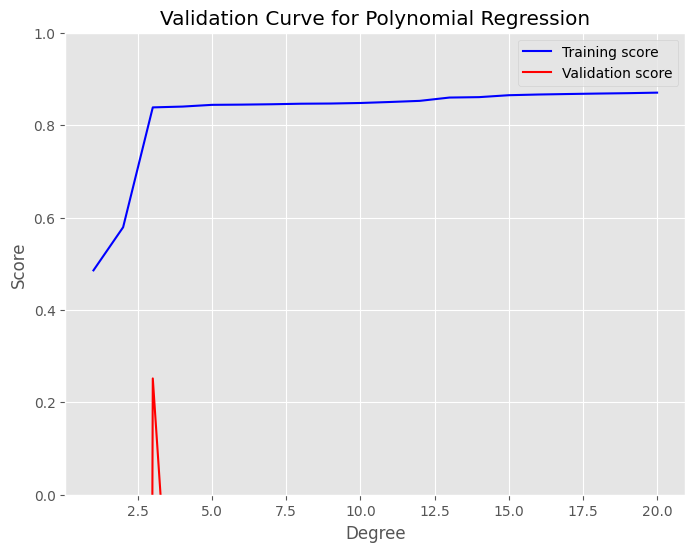

In [5]:
# Polynomial Regression Validation Curve
# This code generates a validation curve for polynomial regression, showing the relationship
# between model complexity (polynomial degree) and model performance on training and validation sets.
#This code evaluates polynomial regression models with degrees from 1 to 20.
#TIt uses validation_curve to compute training and validation scores (R²) for each degree using 5-fold cross-validation.
#T The mean scores across the folds are plotted to show how the training and validation performance changes as model complexity (degree) increases.

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import validation_curve
from sklearn.metrics import make_scorer, r2_score

# Function to generate data points
def make_data(N):
    np.random.seed(0)
    X = np.sort(np.random.rand(N))
    y = np.sin(2 * np.pi * X) + np.random.normal(scale=0.3, size=N)
    return X, y

# Generate 80 data points
X, y = make_data(80)
X = X[:, None]  # Reshape for compatibility with sklearn

# Define the degrees we want to test (from 1 to 20)
degrees = np.arange(1, 21)

# Use validation_curve to evaluate training and validation performance for each degree
train_scores, val_scores = validation_curve(
    make_pipeline(PolynomialFeatures(), LinearRegression()),
    X, y,
    param_name="polynomialfeatures__degree",
    param_range=degrees,
    scoring=make_scorer(r2_score),
    cv=5
)

# Calculate the mean scores for training and validation
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(8, 6))
plt.plot(degrees, train_scores_mean, label="Training score", color="blue")
plt.plot(degrees, val_scores_mean, label="Validation score", color="red")
plt.xlabel("Degree")
plt.ylabel("Score")
plt.title("Validation Curve for Polynomial Regression")
plt.legend(loc="best")
plt.ylim(0, 1)
plt.show()
